In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/books.csv", on_bad_lines = "skip")
df = df.drop('bookID', axis=1)
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
df.tail()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   isbn                11123 non-null  object 
 4   isbn13              11123 non-null  int64  
 5   language_code       11123 non-null  object 
 6     num_pages         11123 non-null  int64  
 7   ratings_count       11123 non-null  int64  
 8   text_reviews_count  11123 non-null  int64  
 9   publication_date    11123 non-null  object 
 10  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 956.0+ KB


In [5]:
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [6]:
df.shape

(11123, 11)

In [9]:
df.isnull().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [10]:
df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [11]:
df.columns = df.columns.str.strip()

In [12]:
df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')

In [13]:
df['publication_date'].head()

0    9/16/2006
1     9/1/2004
2    11/1/2003
3     5/1/2004
4    9/13/2004
Name: publication_date, dtype: object

In [18]:
df['publication_date'] = pd.to_datetime(df['publication_date'],errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11123 non-null  object        
 1   authors             11123 non-null  object        
 2   average_rating      11123 non-null  float64       
 3   isbn                11123 non-null  object        
 4   isbn13              11123 non-null  int64         
 5   language_code       11123 non-null  object        
 6   num_pages           11123 non-null  int64         
 7   ratings_count       11123 non-null  int64         
 8   text_reviews_count  11123 non-null  int64         
 9   publication_date    11121 non-null  datetime64[ns]
 10  publisher           11123 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 956.0+ KB


In [20]:
df[df['publication_date'].isnull()]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8177,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,NaT,Bantam Books
11094,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,NaT,Folio histoire


In [21]:
df['publication_year'] = df['publication_date'].dt.year

In [22]:
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006.0
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004.0
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2003.0
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2004.0


In [23]:
df.isnull().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
publication_year      2
dtype: int64

In [24]:
df["language_code"].value_counts()

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

In [25]:
df = df.dropna()

In [26]:
df.isnull().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
publication_year      0
dtype: int64

In [28]:
df.shape

(11121, 12)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
sns.set_style('whitegrid')

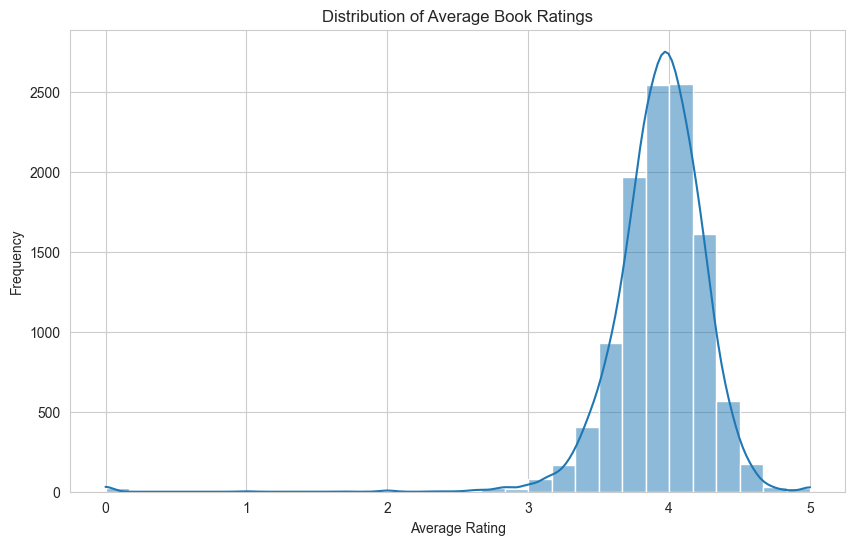

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df['average_rating'], bins=30, kde=10)
plt.title('Distribution of Average Book Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

In [34]:
print(f"Mean rating : {df['average_rating'].mean()}")
print(f"Median rating : {df['average_rating'].median()}")

Mean rating : 3.9340580883014122
Median rating : 3.96


In [35]:
df['is_highly_rated'] = (df['average_rating'] >= df['average_rating'].median()).astype(int)

In [38]:
df[['title', 'average_rating', 'is_highly_rated']].head(20)

,title,average_rating,is_highly_rated
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,1
1,Harry Potter and the Order of the Phoenix (Har...,4.49,1
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,1
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,1
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,1
5,"Unauthorized Harry Potter Book Seven News: ""Ha...",3.74,0
6,Harry Potter Collection (Harry Potter #1-6),4.73,1
7,The Ultimate Hitchhiker's Guide: Five Complete...,4.38,1
8,The Ultimate Hitchhiker's Guide to the Galaxy ...,4.38,1
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,4.22,1
